## 경로 설정

In [ ]:
import os
print(os.getenv("HOME")+"/aiffel/ECG_data/physionet.org/files/circor-heart-sound/1.0.3")
PATH=os.getenv("HOME")+"/aiffel/ECG_data/physionet.org/files/circor-heart-sound/1.0.3/training_data"

SAMPLE_RATE = 4000
HOP_LENGTH = 40

Mounted at /content/drive
/content/drive/MyDrive/aiffel/AIFFELTHON


## 데이터 분석

training_data/num_txt
- 환자번호, 녹음 파일의 개수(av,pv 등등), 샘플레이트(초당 몇번을 나눴는지)
- n개의 녹음파일들 공백기준 hea, wav, tsv 확장자
- 환자 정보  

training_data/num_xy_hea
- 파일명 신호의 수 샘플레이트 총 길이
- wav파일명, ??+??   

training_data/num_xy_wav
- 음성파일  

training_data/num_xy_tsv  
- 공백 기준 시작점 ,끝점 , 타입

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

file_list = os.listdir(PATH)
patient_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".txt")]

#------------------확인용-------------
wav_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".wav")]
label_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".tsv")]
head_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".hea")]

In [ ]:
print(len(file_list)) # 전체 파일
print(len(patient_list)) #환자에 대한 내용
print(len(wav_list)) # wav 파일
print(len(label_list)) # 해당 파일 주석 정보
print(len(head_list)) #샘플레이트 길이가 들어있는 정보
print(patient_list[:5])

In [ ]:
heas = []
wavs = []
tsvs = []

In [ ]:
for path_txt in patient_list:
    #print("{0}.hea".format(path_txt[:-4]))
    with open("{0}.txt".format(path_txt[:-4]), "r") as f:
        P_id, n, sr = f.readline().split()
        for _ in range(int(n)):
            #print(f.readline())
            _, hea, wav, tsv = f.readline().split()
            heas.append(hea)
            wavs.append(wav)
            tsvs.append(tsv)

In [ ]:
len(wavs)

In [ ]:
# 음성 길이 확인
hea_list=[]
for hea in heas:
    path_hea = os.path.join(PATH,hea)
    with open(path_hea, "r") as f:
        id, _, sr, length = f.readline().split()
        hea_list.append(int(length)/float(sr))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hea_list = np.array(hea_list) ## 데이터
bins = np.arange(5,65,1)

print("평균 : ", np.average(hea_list))
print("최대값 : ", np.max(hea_list))
print("최소값 : ", np.min(hea_list))

cut = pd.cut(hea_list, bins=bins) ## 데이터를 일정 구간으로 n등분한다.
#print(cut.describe())

plt.hist(hea_list, bins, rwidth = 0.8, cumulative=True)
plt.xlabel('Data length (sec)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
print("----")
hist, _ =np.histogram(hea_list, bins=bins)
end_index = np.searchsorted(bins, 29, side='right')
print(end_index)

count = np.sum(hist[0:25])
print(count)#5~28초 사이의 데이터 개수

In [ ]:
s1_ranges = []
s2_ranges = []
for tsv in tsvs:
    path_tsv = os.path.join(path,tsv)
    with open(path_tsv, "r") as f:
        while 1:
            line = f.readline()
            if not line: break
            start, end, s_type = line.split()
            if s_type == "1":
                s1_ranges.append(float(end)-float(start))

            elif  s_type == "3":
                s2_ranges.append(float(end)-float(start))

            else:
                break

In [ ]:
s1_ranges = np.array(s1_ranges) ## 데이터
s2_ranges = np.array(s2_ranges)

bins = np.arange(5,65,1)

print("s1 길이 평균 : ", np.average(s1_ranges))
print("s1 길이 최대값 : ", np.max(s1_ranges))
print("s1 길이 최소값 : ", np.min(s1_ranges))
print("s1 표준편차 : ", np.std(s1_ranges))
print("---------------------")

print("s2 길이 평균 : ", np.average(s2_ranges))
print("s2 길이 최대값 : ", np.max(s2_ranges))
print("s2 길이 최소값 : ", np.min(s2_ranges))
print("s2 표준편자 : ", np.std(s2_ranges))

## 환자 ID를 train, test 데이터로 분리

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# txt파일 불러오기
file_list = os.listdir(PATH)
txt_list = [os.path.join(PATH, file) for file in file_list if file.endswith(".txt")]

# 환자 아이디를 훈련 데이터셋과 테스트 데이터셋으로 나눔
train_patient_txt, test_patient_txt = train_test_split(txt_list, test_size=0.2, random_state=42)

# 결과 출력
print("Train Patient IDs:", train_patient_txt)
print("Test Patient IDs:", test_patient_txt)

Train Patient IDs: ['/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/82275.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50080.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/84945.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/49930.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50209.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/84933.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85338.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50742.txt', '/content/drive/MyDrive/aiff

## wav => (주파수, 시간)
## tsv => (class, start time, end time)

In [ ]:
import os
import numpy as np
import librosa
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from scipy.interpolate import interp1d

class CustomDataset(Dataset):
    def __init__(self, path, txt_list, target_size=(40, 2200), resizing=False, th=22):
        self.path = path
        self.txt_list = txt_list
        self.target_size = target_size
        self.th = int(th * SAMPLE_RATE / HOP_LENGTH)
        self.resizing = resizing

        self.get_file_list()
        self.x, self.scale_list = self.get_mel_spectrogram()
        self.y = self.get_label()

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def get_file_list(self):
        self.heas = []
        self.wavs = []
        self.tsvs = []

        for path_txt in self.txt_list:
            with open(path_txt, "r") as f:
                P_id, n, sr = f.readline().split()
                for _ in range(int(n)):
                    _, hea, wav, tsv = f.readline().split()
                    self.heas.append(hea)
                    self.wavs.append(wav)
                    self.tsvs.append(tsv)
        self.heas.sort()
        self.wavs.sort()
        self.tsvs.sort()

    def padding(self, arr, target_length, padding_value=0):
        current_length = arr.shape[-1]
        pad_width = target_length - current_length
        if pad_width > 0:
            arr = np.pad(
                arr,
                ((0, 0), (0, pad_width)),
                mode='constant',
                constant_values=padding_value)
        return arr

    def resize_spectrogram(self, spec, new_shape):
        resized_spec = resize(spec, new_shape, mode='reflect')
        return resized_spec

    def get_mel_spectrogram(self):
        audio_arr = []
        scale_list = []

        for path_wav in self.wavs:
            path = os.path.join(self.path, path_wav)
            x = librosa.load(path, sr=SAMPLE_RATE)[0]
            ms = librosa.feature.melspectrogram(
                y=x,
                sr=SAMPLE_RATE,
                n_fft=128,
                win_length=100,
                hop_length=HOP_LENGTH,
                n_mels=40)

            # th보다 길이가 길다면 Slicing
            if ms.shape[-1] > self.th:
                ms = ms[:, :self.th]
                scale = 1
            # th보다 길이가 짧다면
            elif ms.shape[-1] < self.th:
                # Resizing
                if self.resizing is True:
                    scale = self.th / ms.shape[1]
                    target_shape = (ms.shape[0], self.th)
                    ms = self.resize_spectrogram(ms, target_shape)
                # Padding
                else:
                    ms = self.padding(ms, self.th)
            # 최종 Resizing
            ms = self.resize_spectrogram(ms, self.target_size)
            audio_arr.append(ms)
            if self.resizing is True:
                scale_list.append(scale)
        return audio_arr, scale_list

    def get_label(self):
        labels = []
        for i, path_tsv in enumerate(self.tsvs):
            label = []
            path = os.path.join(self.path, path_tsv)
            tsv_data = pd.read_csv(path, sep='\t', header=None)
            if self.resizing is True:
                scale = self.scale_list[i]
            for _, tsv_row in tsv_data.iterrows():
                if tsv_row[2] in [1, 3] and tsv_row[0] <= self.th and tsv_row[1] <= self.th:
                    # 구간 불러와서 sr값 곱하고 hop_legth로 나누기
                    tsv_row[0] *= SAMPLE_RATE / HOP_LENGTH
                    tsv_row[1] *= SAMPLE_RATE / HOP_LENGTH
                    tsv_row[2] = 0 if tsv_row[2] == 1 else 1    # S1=0, S2=1

                    # th보다 길이가 길다면 Slicing
                    if tsv_row[0] > self.th or tsv_row[1] > self.th:
                        break
                    # th보다 길이가 짧다면
                    else:
                        # resize를 하였다면 라벨 값도 스케일링
                        if self.resizing is True:
                            tsv_row[0] *= scale
                            tsv_row[1] *= scale
                        # 최종 resize한 값 으로 보간
                        tsv_row[0] *= self.target_size[1] / self.th
                        tsv_row[1] *= self.target_size[1] / self.th
                        label.append((int(tsv_row[2]), tsv_row[0], tsv_row[1]))
            labels.append(label)
        return labels

### 패딩, 리사이징 결과 히스토그램 시각화

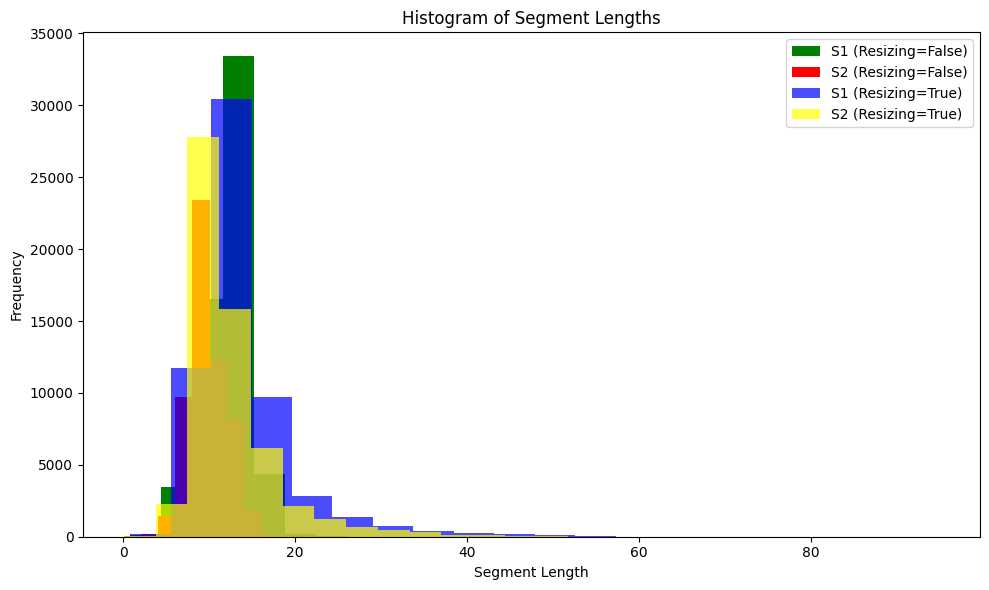

S1 (Resizing=False):
  Min Length: 0.8209000000000515
  Max Length: 72.91699999999992
  Mean Length: 11.931950304794048 

S1 (Resizing=True):
  Min Length: 0.8209000000000515
  Max Length: 94.96402877697892
  Mean Length: 14.127977294661392 

S2 (Resizing=False):
  Min Length: 0.08700000000010277
  Max Length: 39.97499999999991
  Mean Length: 10.579499626787584 

S2 (Resizing=True):
  Min Length: 0.08700000000010277
  Max Length: 73.94961538461484
  Mean Length: 12.52216801789399 



In [ ]:
import matplotlib.pyplot as plt

# 데이터셋 생성
dataset_resizing_false = CustomDataset(PATH, txt_list, resizing=False)
dataset_resizing_true = CustomDataset(PATH, txt_list, resizing=True)

# 데이터와 레이블 추출
data_resizing_false = dataset_resizing_false.x
labels_resizing_false = dataset_resizing_false.y

data_resizing_true = dataset_resizing_true.x
labels_resizing_true = dataset_resizing_true.y

# 클래스별 데이터 길이 저장
class_lengths_resizing_false = {0: [], 1: []}
class_lengths_resizing_true = {0: [], 1: []}

for i in range(len(data_resizing_true)):
    spec_false = data_resizing_false[i]
    label_false = labels_resizing_false[i]
    spec_true = data_resizing_true[i]
    label_true = labels_resizing_true[i]

    for l in label_false:
        class_id, start, end = l
        class_lengths_resizing_false[class_id].append(end - start)

    for l in label_true:
        class_id, start, end = l
        class_lengths_resizing_true[class_id].append(end - start)

# 히스토그램 그리기
plt.figure(figsize=(10, 6))

plt.hist(class_lengths_resizing_false[0], bins=20, alpha=1.0, color='green', label='S1 (Resizing=False)')
plt.hist(class_lengths_resizing_false[1], bins=20, alpha=1.0, color='red', label='S2 (Resizing=False)')
plt.hist(class_lengths_resizing_true[0], bins=20, alpha=0.7, color='blue', label='S1 (Resizing=True)')
plt.hist(class_lengths_resizing_true[1], bins=20, alpha=0.7, color='yellow', label='S2 (Resizing=True)')

plt.xlabel("Segment Length")
plt.ylabel("Frequency")
plt.title("Histogram of Segment Lengths")
plt.legend()

plt.tight_layout()
plt.show()

for class_id in [0, 1]:
    print(f"S{class_id + 1} (Resizing=False):")
    print("  Min Length:", np.min(class_lengths_resizing_false[class_id]))
    print("  Max Length:", np.max(class_lengths_resizing_false[class_id]))
    print("  Mean Length:", np.mean(class_lengths_resizing_false[class_id]), "\n")

    print(f"S{class_id + 1} (Resizing=True):")
    print("  Min Length:", np.min(class_lengths_resizing_true[class_id]))
    print("  Max Length:", np.max(class_lengths_resizing_true[class_id]))
    print("  Mean Length:", np.mean(class_lengths_resizing_true[class_id]), "\n")


## 데이터 변환 결과 시각화

(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)
(40, 2200)


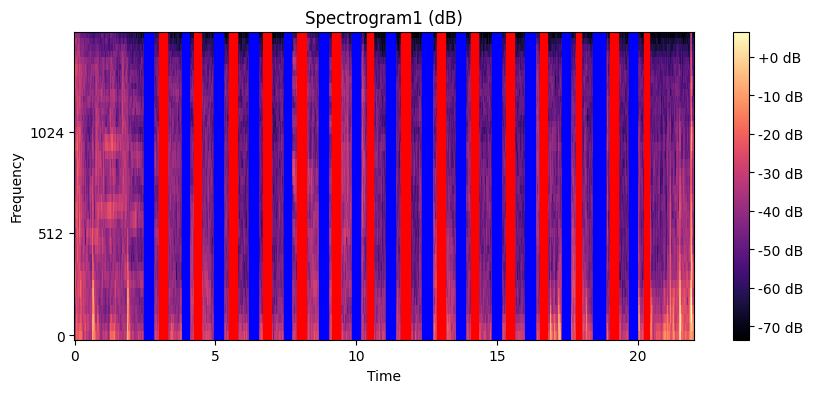

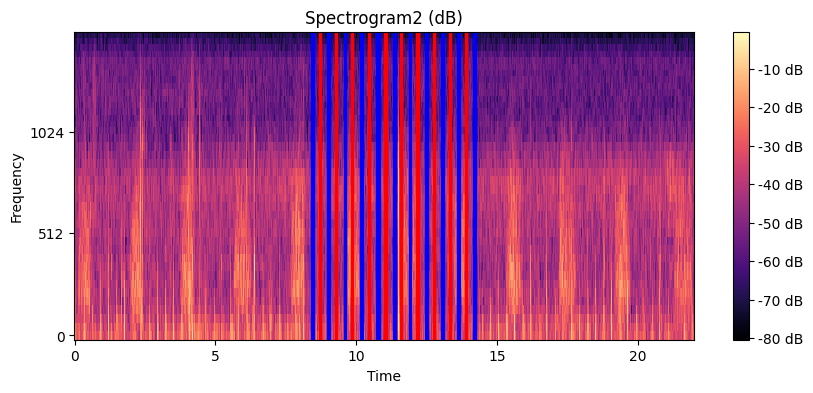

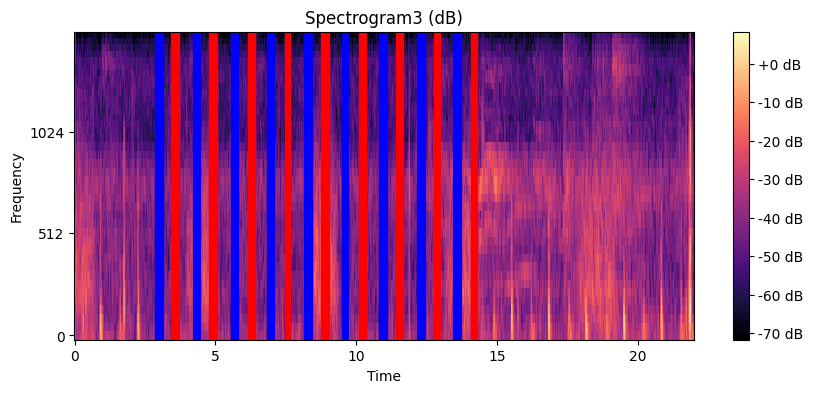

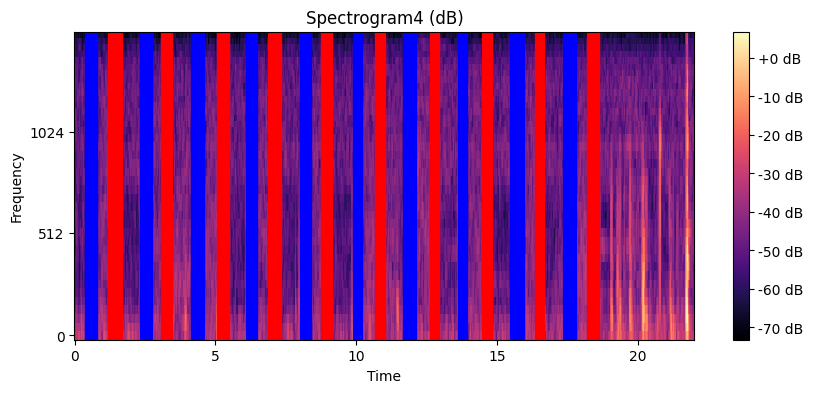

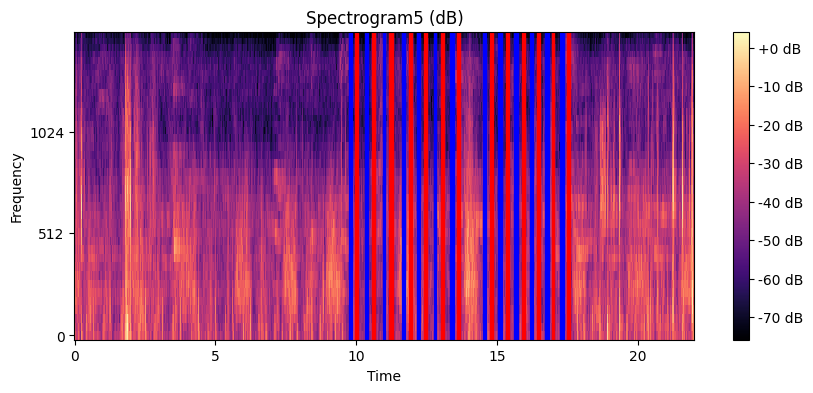

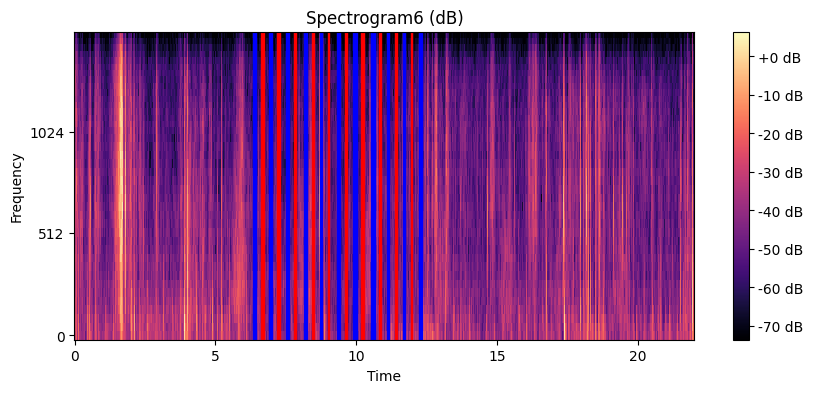

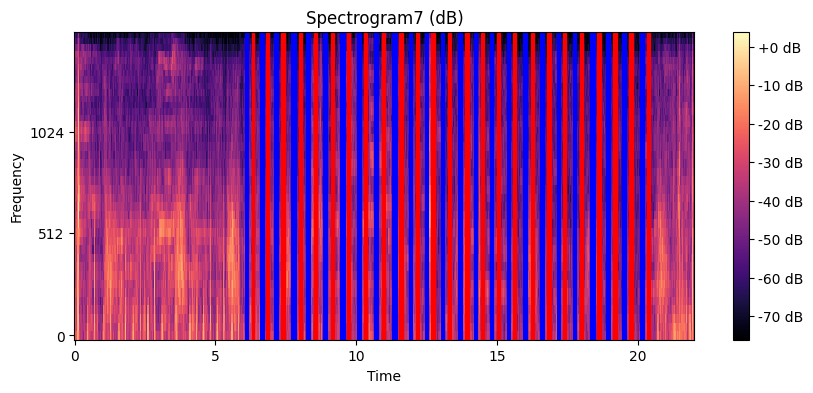

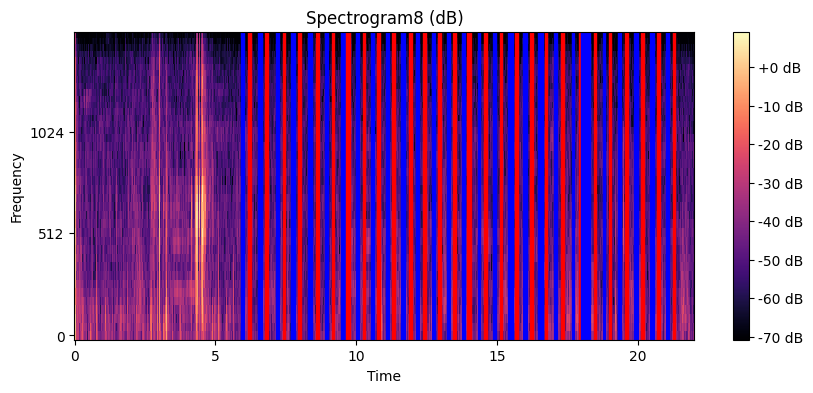

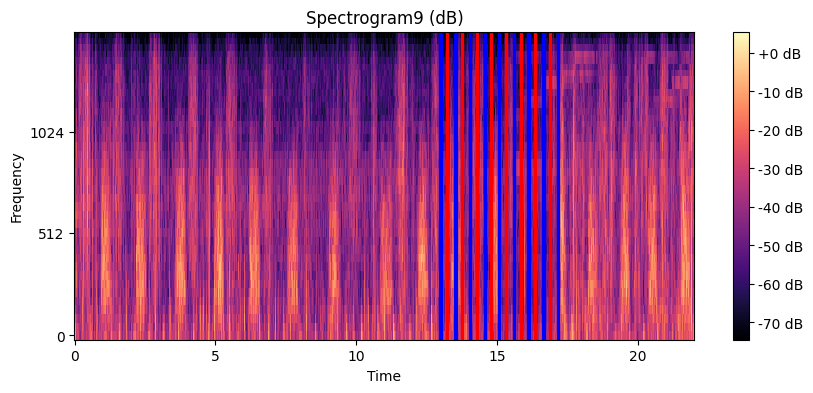

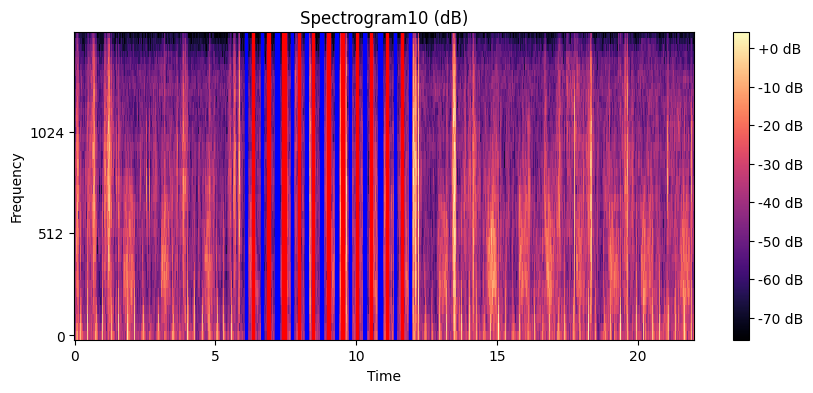

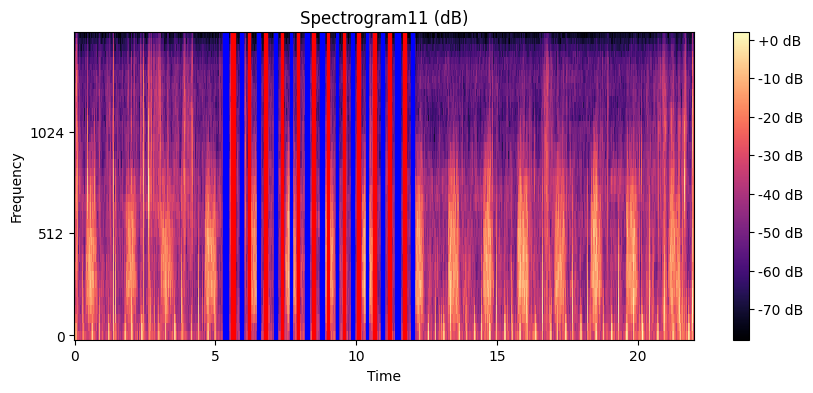

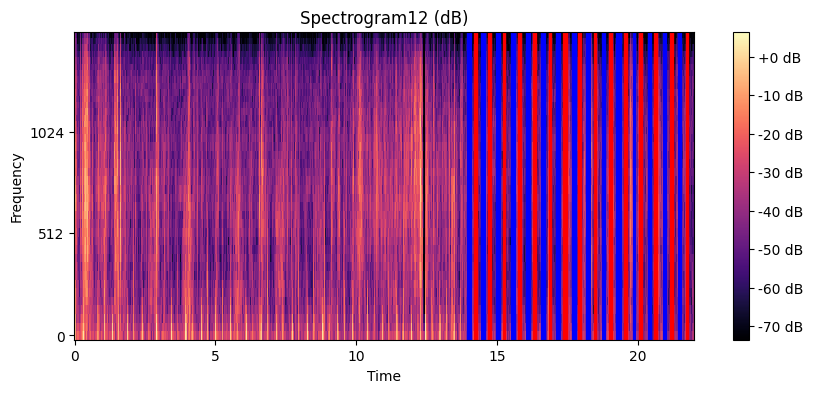

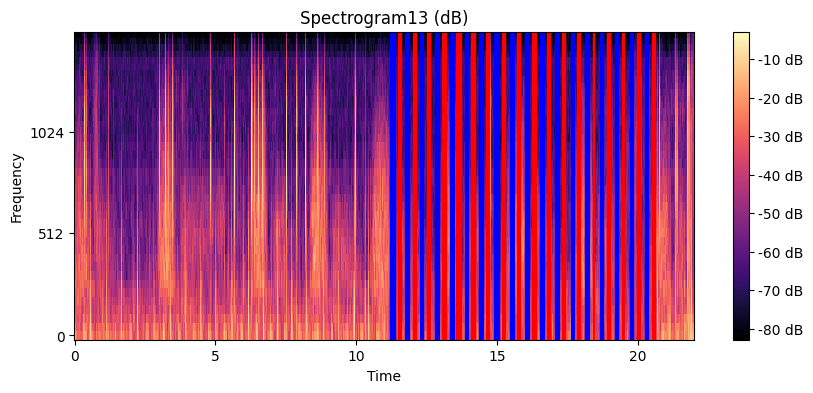

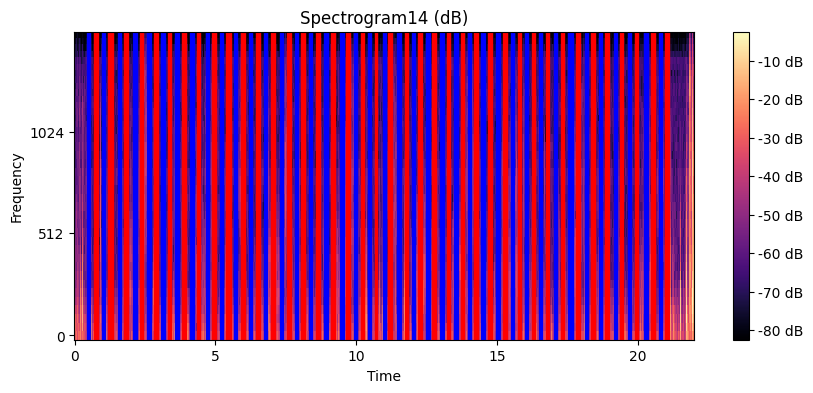

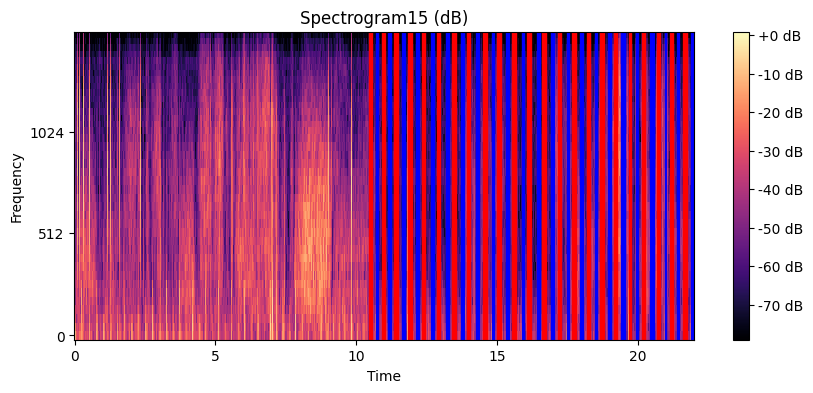

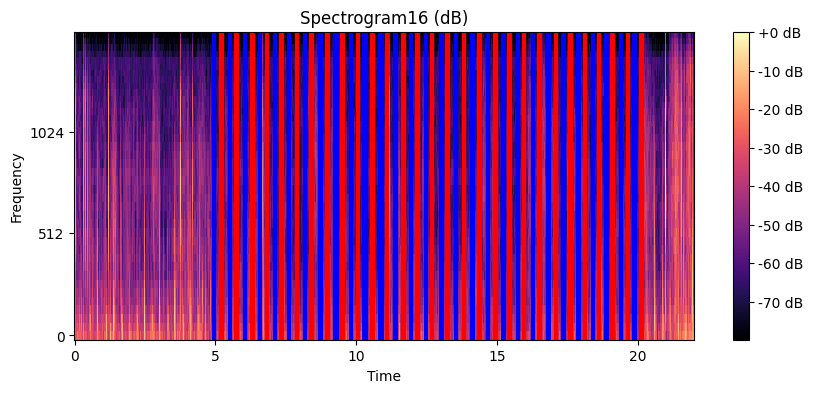

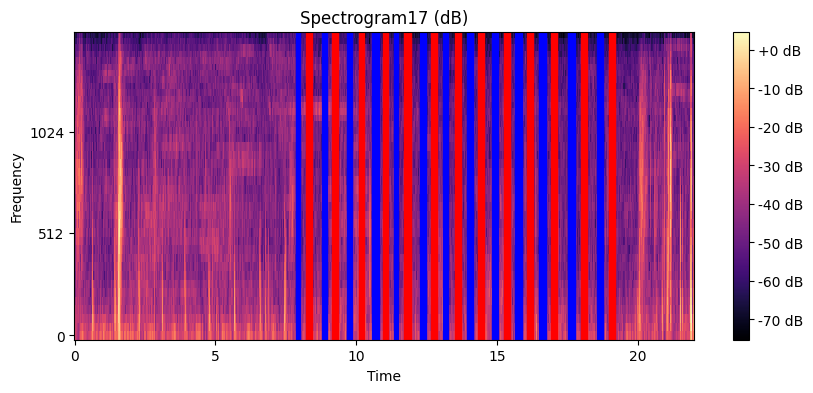

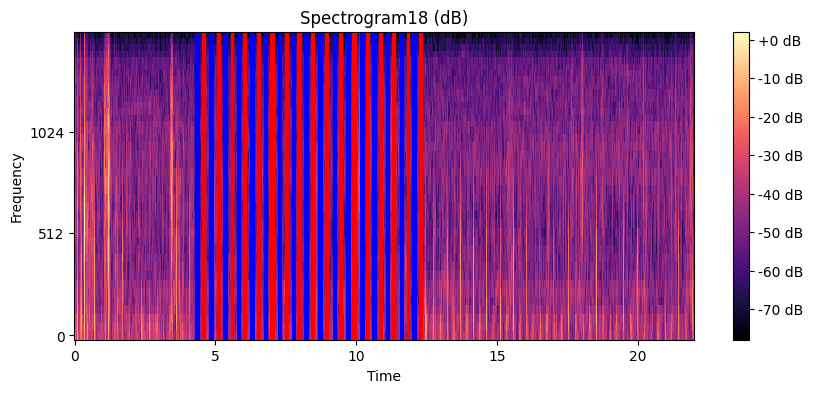

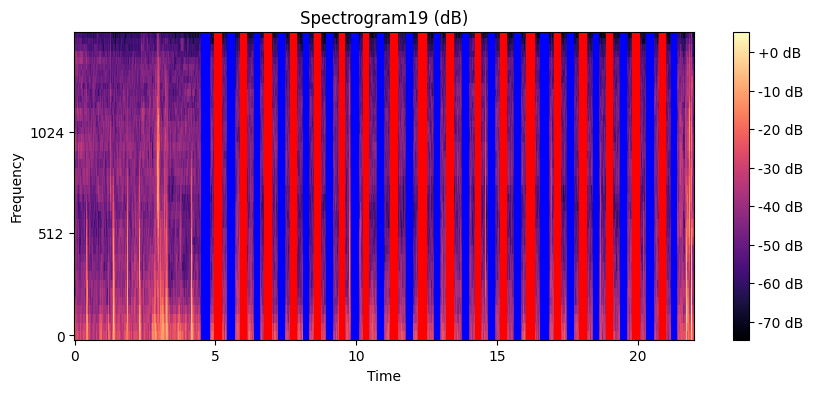

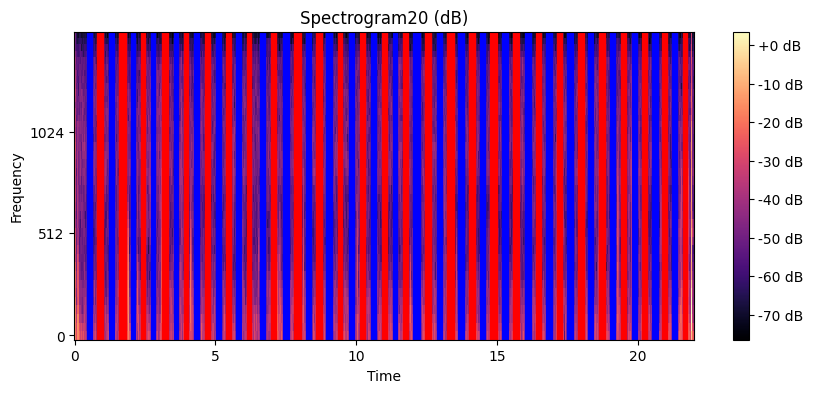

In [ ]:
import matplotlib.pyplot as plt

for i, d in enumerate(dataset):
    if i == 20:
        break
    x, y = d
    print(x.shape)

    plt.figure(figsize=(10,4))
    # 스펙트로그램 시각화
    librosa.display.specshow(
        librosa.power_to_db(x), sr=SAMPLE_RATE, hop_length=HOP_LENGTH, x_axis='time', y_axis='mel')

    # 레이블 시각화
    for label in y:
        class_id, start, end = label
        start /= SAMPLE_RATE / HOP_LENGTH
        end /= SAMPLE_RATE / HOP_LENGTH
        color = 'red' if class_id == 1 else 'blue'
        plt.axvspan(start, end, color=color)

    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram{i + 1} (dB)")